# LSTM Cosine Function

#### How to use stateful RNNs (LSTM and GRU) are used to model long sequences efficiently.

Keras RNN API is documented here: http://keras.io/layers/recurrent/


Whenever you train or test your LSTM, you first have to build your input matrix X of shape `nb_samples`, `timesteps`, `input_dim` where your `batch_size` divides `nb_samples`. For instance, if `nb_samples=1024` and `batch_size=64`, it means that your model will receive blocks of 64 samples, compute each output (whatever the number of timesteps is for every sample), average the gradients and propagate it to update the parameters vector

By default, Keras shuffles (permutes) the samples in X and the dependencies between $X_i$ and $X_{i+1}$ are lost. Let’s assume there’s no shuffling in our explanation. 

When the model is stateless, Keras allocates an array for the states of size `output_dim` (understand number of cells in your LSTM). At each sequence processing, this state array is reset. 

With the stateful model, all the states are propagated to the next batch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
%matplotlib inline

## Generate Training Data

Generating Data..
Input shape: (50000, 1, 1)
Output shape: (50000, 1)


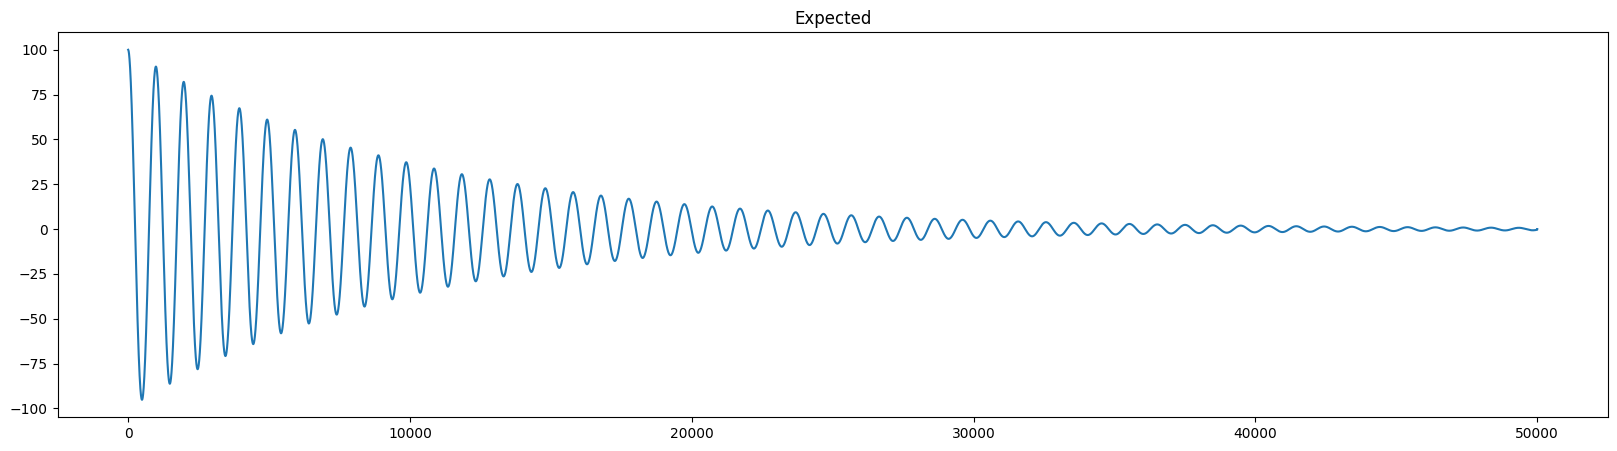

In [2]:
def gen_cosine_amp(amp=100, period=25, x0=0, xn=50000, step=1, k=0.0001):
    """Generates an absolute cosine time series with the amplitude
    exponentially decreasing
    Arguments:
        amp: amplitude of the cosine function
        period: period of the cosine function
        x0: initial x of the time series
        xn: final x of the time series
        step: step of the time series discretization
        k: exponential rate
    """
    cos = np.zeros(((xn - x0) * step, 1, 1))
    for i in range(len(cos)):
        idx = x0 + i * step
        cos[i, 0, 0] = amp * np.cos(idx / (2 * np.pi * period))
        cos[i, 0, 0] = cos[i, 0, 0] * np.exp(-k * idx)
    return cos


# number of elements ahead that are used to make the prediction
lahead = 1

print('Generating Data..')
cos = gen_cosine_amp()
print('Input shape:', cos.shape)

expected_output = np.zeros((len(cos), 1))
for i in range(len(cos) - lahead):
    expected_output[i, 0] = np.mean(cos[i + 1:i + lahead + 1])

#print(cos)
#print(expected_output)
print('Output shape:',expected_output.shape)

#plot training data
plt.figure(figsize=(20,5))
plt.plot(expected_output)
plt.title('Expected')
plt.show()

## LSTM Model

Making a RNN stateful means that the states for the samples of each batch will be reused as initial states for the samples in the next batch.

In [9]:
# since we are using stateful rnn tsteps can be set to 1
tsteps = 1
batch_size = 25
epochs = 10 #Should be higher but will take more time to run

In [10]:
#hint
#batch_input_shape=(batch_size, tsteps, 1),return_sequences=True,stateful=True)
model = Sequential()
model.add(LSTM(50, batch_input_shape=(batch_size, tsteps, 1), return_sequences=True, stateful=True))
model.add(Dense(1))

In [11]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
#Train an LSTM model

print('Training')
for i in range(epochs):
    print('Epoch', i, '/', epochs)
    model.fit(cos,
              expected_output,
              batch_size=batch_size,
              verbose=1,
              epochs=1,
              shuffle=False)
    model.reset_states()


Training
Epoch 0 / 10
2000/2000 [==============================] - 8s 4ms/step - loss: 375.8314
Epoch 1 / 10
2000/2000 [==============================] - 7s 4ms/step - loss: 173.1347
Epoch 2 / 10
2000/2000 [==============================] - 7s 4ms/step - loss: 73.4627
Epoch 3 / 10
2000/2000 [==============================] - 7s 4ms/step - loss: 34.5625
Epoch 4 / 10
2000/2000 [==============================] - 7s 4ms/step - loss: 17.4573
Epoch 5 / 10
2000/2000 [==============================] - 8s 4ms/step - loss: 11.8836
Epoch 6 / 10
2000/2000 [==============================] - 8s 4ms/step - loss: 7.0973
Epoch 7 / 10
2000/2000 [==============================] - 7s 4ms/step - loss: 7.0055
Epoch 8 / 10
2000/2000 [==============================] - 7s 4ms/step - loss: 5.7764
Epoch 9 / 10
2000/2000 [==============================] - 7s 4ms/step - loss: 4.9836


## Check Model

In [13]:
print("Model Parameters :", model.count_params())
print("Output Shape :", model.output_shape)
#print("Model Weights :", model.get_weights())

Model Parameters : 10451
Output Shape : (25, 1, 1)


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (25, 1, 50)               10400     
                                                                 
 dense (Dense)               (25, 1, 1)                51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Predict model output

In [15]:
print('Predicting')
predicted_output = model.predict(cos, batch_size=batch_size)

Predicting
2000/2000 [==============================] - 3s 2ms/step


In [17]:
predicted_output.shape

(50000, 1, 1)

In [18]:
expected_output.shape

(50000, 1)

## Plot results

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(expected_output, "grey", label='Train')
plt.plot(predicted_output, "green", label='Test')
plt.title('Predicted')
plt.legend()
plt.show()

## GRU Model

In [ ]:
#Train a GRU model


In [ ]:
print('Training')
for i in range(epochs):
    print('Epoch', i, '/', epochs)
    model.fit(cos,
              expected_output,
              batch_size=batch_size,
              verbose=1,
              epochs=1,
              shuffle=False)
    model.reset_states()

## Check Model

In [ ]:
print("Model Parameters :", model.count_params())
print("Output Shape :", model.output_shape)
#print("Model Weights :", model.get_weights())

In [ ]:
model.summary()

## Predict model output

In [ ]:
print('Predicting')
predicted_output = model.predict(cos, batch_size=batch_size)

## Plot results

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(expected_output, "grey", label='Train')
plt.plot(predicted_output, "green", label='Test')
plt.title('Predicted')
plt.legend()
plt.show()